In [15]:
import warnings

import numpy as np

import pandas as pd



import seaborn as sns

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

warnings.filterwarnings ( 'ignore' )

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 

from sklearn.linear_model import LogisticRegression , Ridge , Lasso 

from sklearn.model_selection import train_test_split , GridSearchCV , KFold

from sklearn.preprocessing import LabelEncoder , MinMaxScaler , Normalizer , StandardScaler

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , StackingClassifier 

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , roc_curve , roc_auc_score




In [4]:
DF = pd.read_csv ( "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv" , names = [ 'ID' , 'Refractive_Index' , 'Sodium_%' , 'Magnesium_%' , 'Aluminium_%' , 
                                           'Silicon_%' , 'Potassium_%' , 'Calcium_%' , 'Barium_%' , 'Iron_%' , 
                                           'Type_Of_Glass' ]  )

DF

,ID,Refractive_Index,Sodium_%,Magnesium_%,Aluminium_%,Silicon_%,Potassium_%,Calcium_%,Barium_%,Iron_%,Type_Of_Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
Description = pd.DataFrame ( DF.describe ( ) ).transpose ( ) 

Description

,count,mean,std,min,25%,50%,75%,max
ID,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
Refractive_Index,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Sodium_%,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Magnesium_%,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Aluminium_%,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Silicon_%,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
Potassium_%,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Calcium_%,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Barium_%,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Iron_%,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


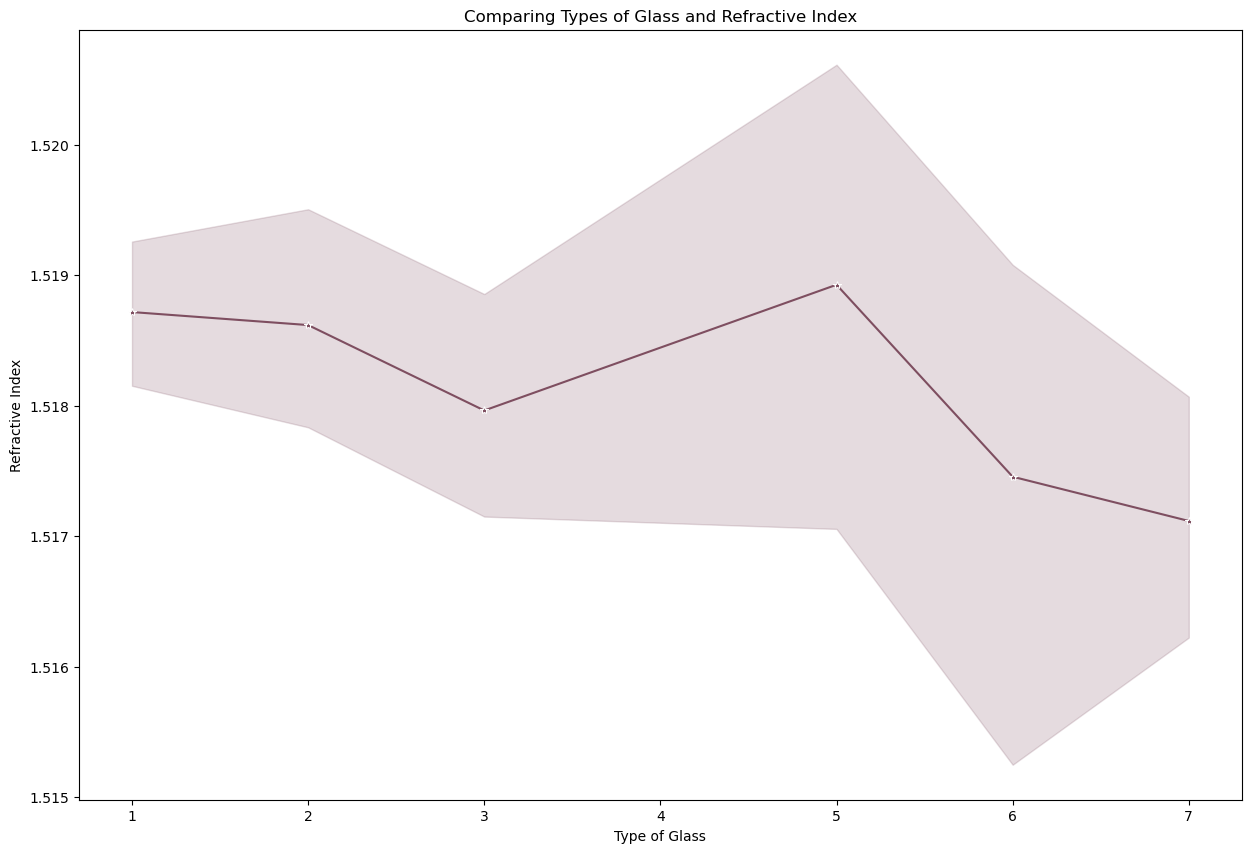

In [6]:
plt.figure ( figsize = ( 15 , 10 ) );

sns.lineplot ( y = 'Refractive_Index' , x = 'Type_Of_Glass', data = DF , color = '#7E4E60' , marker = '*');

plt.xlabel ( "Type of Glass" );

plt.ylabel ( "Refractive Index" );

plt.title ( "Comparing Types of Glass and Refractive Index" );

In [7]:
Chemicals = DF.groupby ( by = DF.Type_Of_Glass ).mean ( ).reset_index( ).transpose ( )

Chemicals

,0,1,2,3,4,5
Type_Of_Glass,1.000000,2.000000,3.000000,5.000000,6.000000,7.000000
ID,35.500000,108.500000,155.000000,170.000000,181.000000,200.000000
Refractive_Index,1.518718,1.518619,1.517964,1.518928,1.517456,1.517116
Sodium_%,13.242286,13.111711,13.437059,12.827692,14.646667,14.442069
Magnesium_%,3.552429,3.002105,3.543529,0.773846,1.305556,0.538276
Aluminium_%,1.163857,1.408158,1.201176,2.033846,1.366667,2.122759
Silicon_%,72.619143,72.598026,72.404706,72.366154,73.206667,72.965862
Potassium_%,0.447429,0.521053,0.406471,1.470000,0.000000,0.325172
Calcium_%,8.797286,9.073684,8.782941,10.123846,9.356667,8.491379
Barium_%,0.012714,0.050263,0.008824,0.187692,0.000000,1.040000


<Figure size 1000x1000 with 0 Axes>

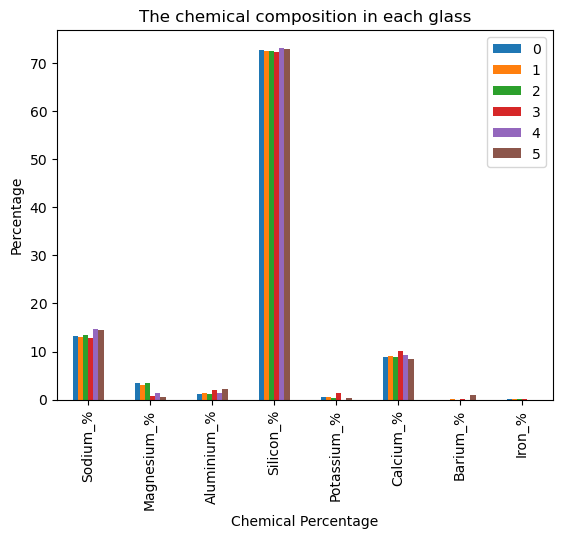

In [8]:
plt.figure ( figsize = ( 10 , 10 ) )

Chemicals.iloc [ 3 : , : ].plot ( kind = 'bar' , label = [ 'building_windows_float_processed' , 
                                                  
                                                  'building_windows_non_float_processed' , 
                                                  
                                                  'vehicle_windows_float_processed' , 'containers' , 'tableware' , 
                                                  
                                                  'headlamps' ] );

plt.title ( "The chemical composition in each glass" )

plt.xlabel ( "Chemical Percentage" )

plt.ylabel ( "Percentage" );

<Axes: >

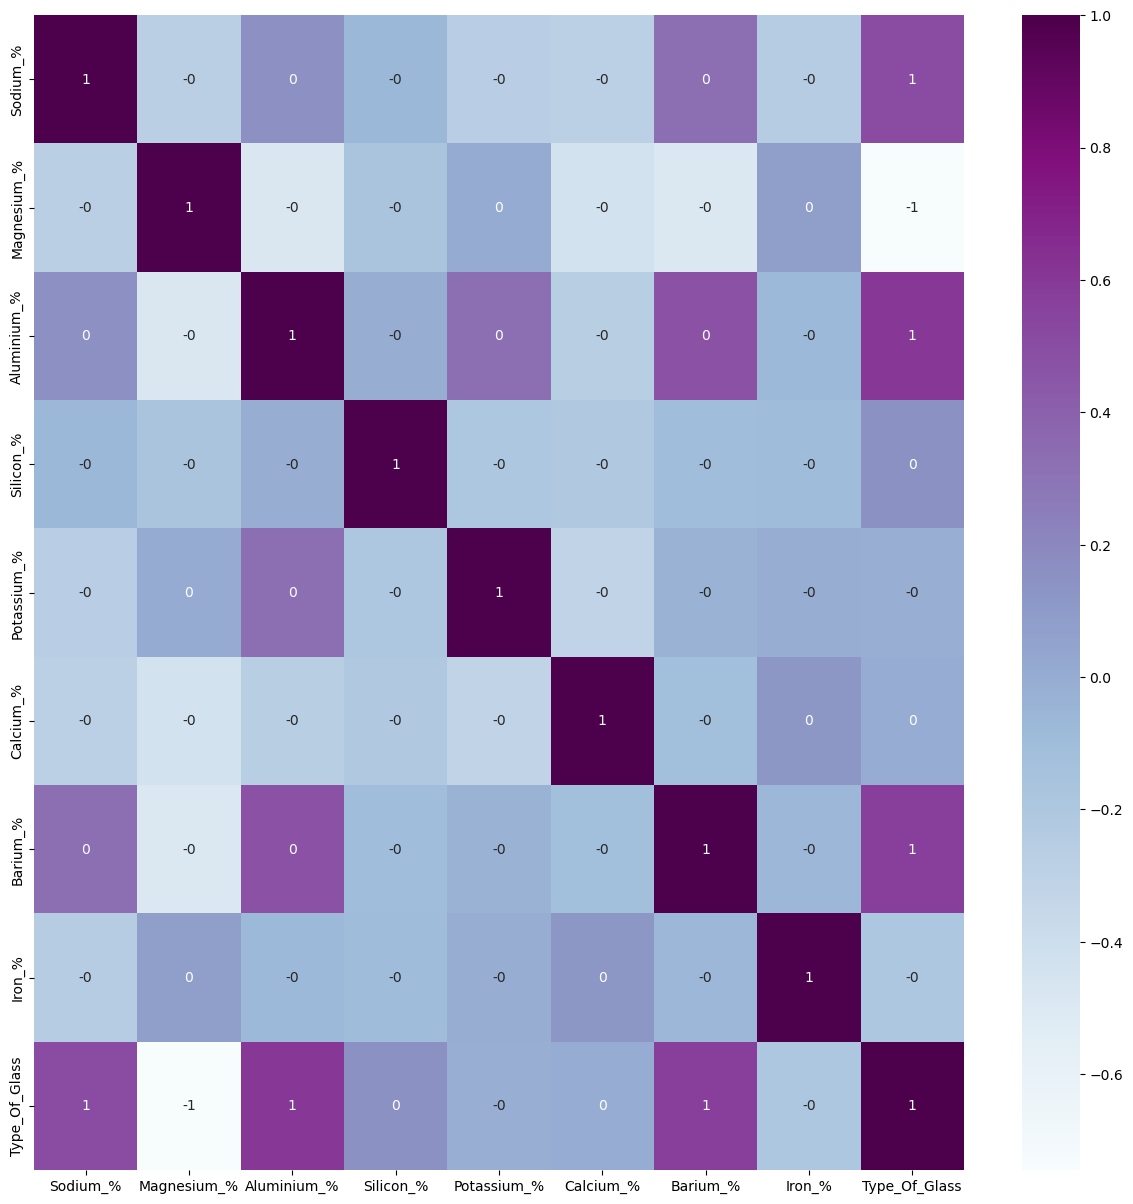

In [9]:
plt.figure ( figsize = ( 15 , 15) )
sns.heatmap ( data = DF.iloc [ : , 2 : ].corr ( ) ,  annot = True , fmt = '.0f' , cmap = 'BuPu' )

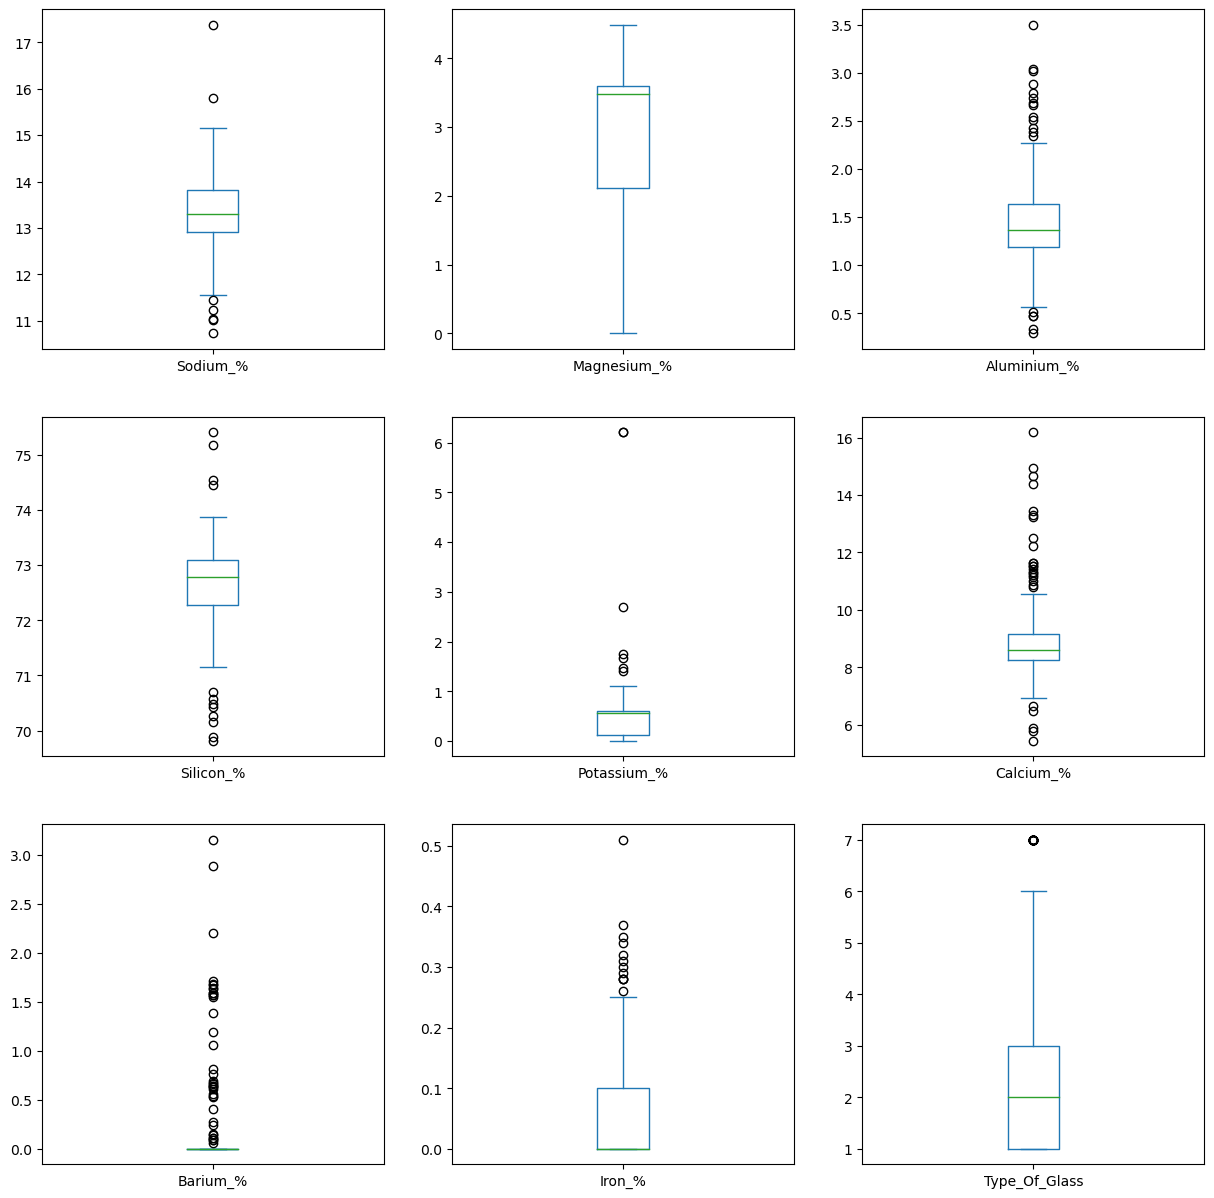

In [10]:
DF.iloc [ : , 2 : ].plot ( kind = 'box' , subplots = True , layout = ( 3 , 3 ) , sharex = False , sharey = False , figsize = ( 15 , 15) );

In [11]:
Outliers = DF.iloc [ : , 2 : -1 ] 

Outliers

,Sodium_%,Magnesium_%,Aluminium_%,Silicon_%,Potassium_%,Calcium_%,Barium_%,Iron_%
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
for i in Outliers : 
        
    Outliers[Outliers [i] < Outliers [ i ].quantile ( 0.10 )] = Outliers [ i ].mean ( ) 

    Outliers[Outliers [i] > Outliers [ i ].quantile ( 0.90 )] = Outliers [ i ].mean ( ) 

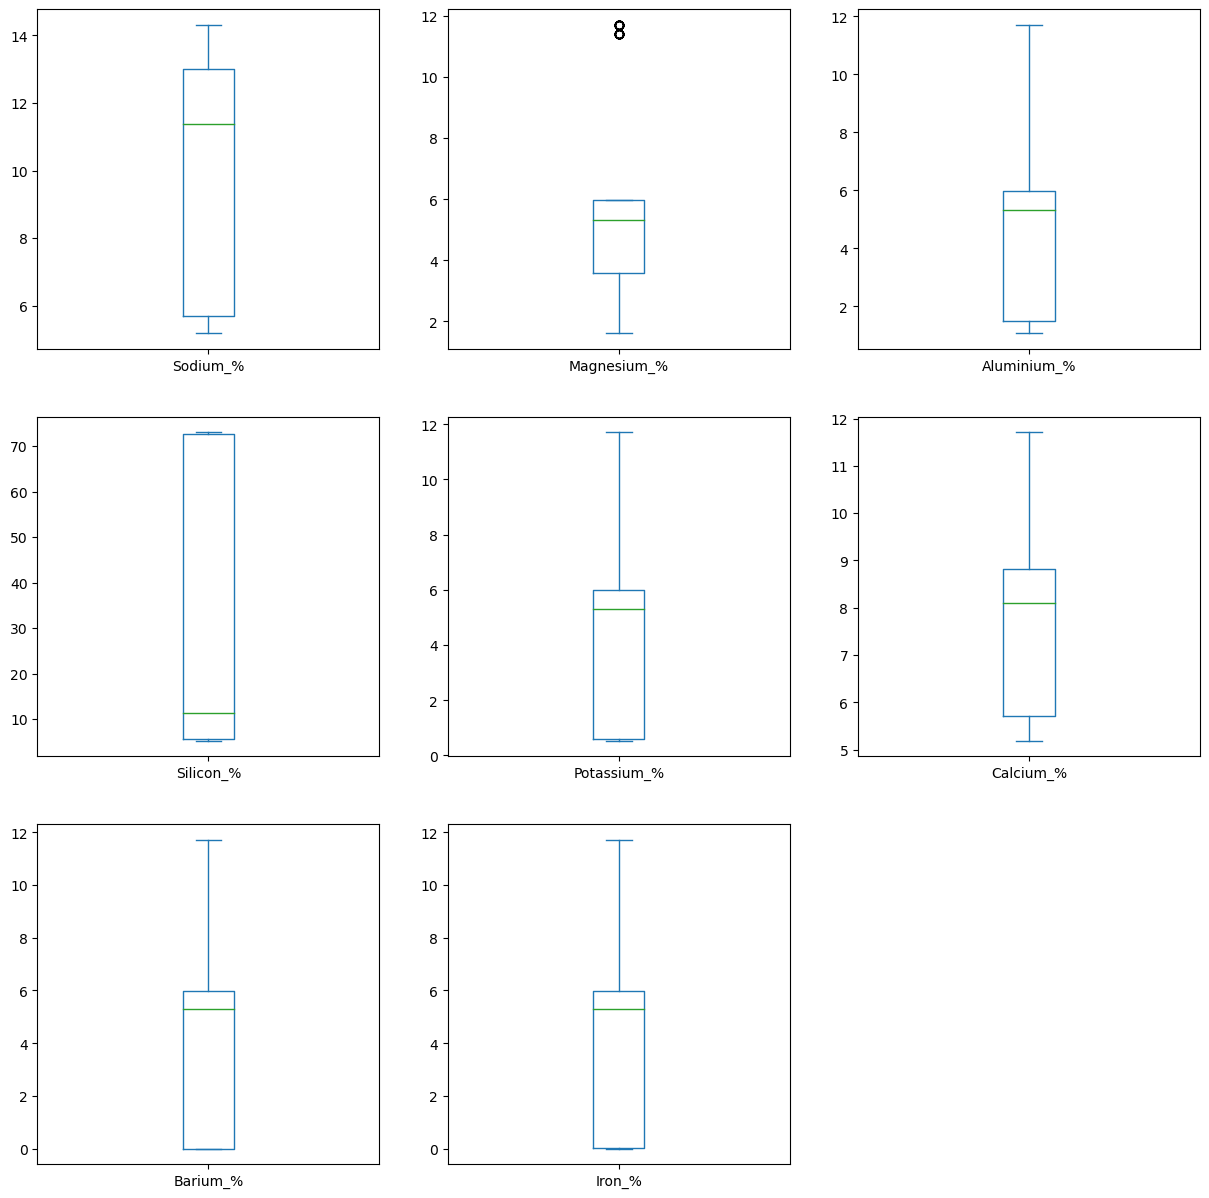

In [13]:
Outliers.plot ( kind = 'box' , subplots = True , layout = ( 3 , 3 ) , sharex = False , sharey = False , figsize = ( 15 , 15) );

In [32]:


Train , Test = train_test_split ( DF , test_size = 0.15 , random_state = 42 )

Train_X = Train.iloc [ : , : - 1 ]

Train_Y = Train.iloc [ : ,  -1 ]

Test_X = Test.iloc [ : , : - 1 ]

Test_Y = Test.iloc [ : ,  -1 ]

print ( "The shapes of the data sets are : " )

print ( "\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format ( Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape) )

The shapes of the data sets are : 

Train >> (181, 10) , Test >> (33, 10)

Train_X >> (181, 9) , Train_Y >> (181,)

Test_X >> (33, 9) , Test_Y >> (33,)


In [33]:
LR = LogisticRegression ( )

LR.fit ( Train_X ,Train_Y )

Y_LR = LR.predict ( Test_X )

Accuracy_LR = np.round ( accuracy_score ( Test_Y , Y_LR ) * 100 , 2 ) 

print ( "The accuracy of the Test Data is : " , Accuracy_LR )

The accuracy of the Test Data is :  63.64


Text(0.5, 1.0, 'Confusion Matrix')

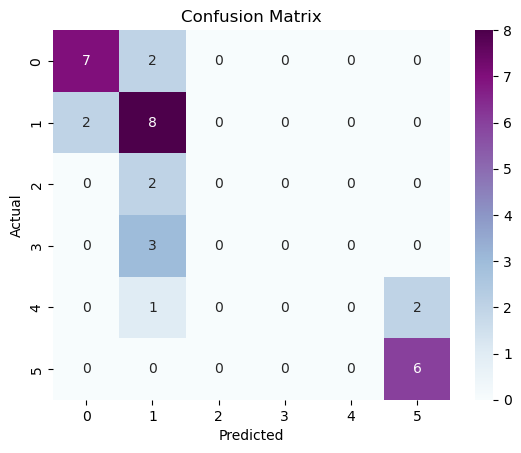

In [34]:
Confusion_Matrix_LR = confusion_matrix ( Test_Y , Y_LR )

sns.heatmap ( Confusion_Matrix_LR , annot = True , fmt = '.0f' , cmap = 'BuPu' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

In [35]:
train_predictions = LR.predict(Train_X)

test_predictions = LR.predict(Test_X)

train_accuracy = np.round ( accuracy_score ( Train_Y, train_predictions ) * 100 , 2 )

test_accuracy = np.round ( accuracy_score ( Test_Y, test_predictions ) * 100 , 2 )

print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 63.54

Test Accuracy >> 63.64


In [36]:
RF = RandomForestClassifier ( )

Parameters = { 'n_estimators' : [ 50 , 100 , 150 , 200 ],
              
               'criterion' : [ 'gini' , 'entropy' ],
              
               'max_depth' : [ 5 , 10 , 15 ] ,
             
               'min_samples_split' : [ 5 , 10 , 15 ] }

GS = GridSearchCV ( estimator = RF , param_grid = Parameters , cv = 5 )

GS.fit ( Train_X , Train_Y )

Parameters = GS.best_params_ 

print ( "The best parameters are : \n\n" , Parameters )

The best parameters are : 

 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [37]:
RF = RandomForestClassifier ( **Parameters )

RF.fit ( Train_X , Train_Y )

Y_RF = RF.predict ( Test_X )

Accuracy_RF = np.round ( accuracy_score ( Test_Y , Y_RF ) * 100 , 2 )

print ( "The accuracy of the Test Data is : " , Accuracy_RF )

The accuracy of the Test Data is :  87.88


<Axes: >

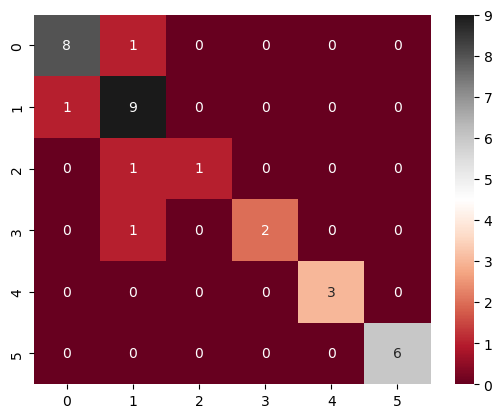

In [38]:
Confusion_Matrix_RF = confusion_matrix ( Test_Y , Y_RF )

Confusion_Matrix_RF = sns.heatmap ( Confusion_Matrix_RF , fmt = '0.0f' , annot = True , cmap = 'RdGy' )

Confusion_Matrix_RF

In [39]:
train_predictions = RF.predict ( Train_X )

test_predictions = RF.predict ( Test_X )

train_accuracy = np.round ( accuracy_score ( Train_Y, train_predictions ) * 100 , 2 ) 

test_accuracy = np.round ( accuracy_score ( Test_Y, test_predictions ) * 100 , 2 ) 

print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 98.9

Test Accuracy >> 87.88


In [40]:
DT = DecisionTreeClassifier (  )

Parameters = { 'criterion' : [ 'gini' , 'entropy' ],
              
               'splitter' : [ 'best' , 'random' ],
              
               'max_depth' : [ None ,  5 , 10 , 15 ] ,
             
               'max_features' : [ "auto", "sqrt", "log2" ] }

GS = GridSearchCV ( estimator = DT , param_grid = Parameters , cv = 5 )

GS.fit ( Train_X , Train_Y )

Parameters = GS.best_params_

print ( "The best parameters of decision tree are : \n\n" , Parameters )

The best parameters of decision tree are : 

 {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'splitter': 'best'}


The accuracy of the test data is :  81.82


<Axes: >

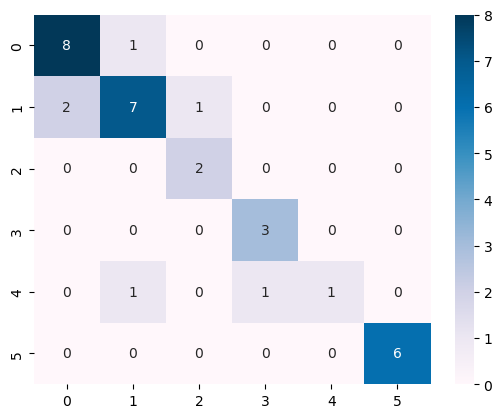

In [41]:
DT = DecisionTreeClassifier ( **Parameters )

DT.fit ( Train_X , Train_Y )

Y_DT = DT.predict ( Test_X )

Accuracy_DT = np.round ( accuracy_score ( Test_Y , Y_DT ) * 100 , 2 ) 

print ( "The accuracy of the test data is : " , Accuracy_DT )

Confusion_Matrix_DT = sns.heatmap ( confusion_matrix ( Test_Y , Y_DT ) , fmt = '0.0f' , annot = True , cmap = 'PuBu' )

Confusion_Matrix_DT

In [42]:
Y_DT_Train = DT.predict ( Train_X )

Train_Accuracy = np.round ( accuracy_score ( Train_Y , Y_DT_Train ) * 100 , 2 )


if int ( Train_Accuracy - Accuracy_DT ) > 5.0  :
    
    print ( "There is overfitting"  )
    
else :
    
    print ( "There is no overfitting\n"  )

print ( "\nThe Training accuracy is : {} \n\nThe Testing accuracy is : {}".format( Train_Accuracy , Accuracy_DT ) )

There is overfitting

The Training accuracy is : 100.0 

The Testing accuracy is : 81.82


In [43]:
GB = GradientBoostingClassifier ( )

Parameters = {  'loss' : [ 'log_loss' ,'deviance', 'exponential' ] ,
    
                'learning_rate' : [ 0.1 , 0.01 , 0.001 ] ,
    
                'n_estimators' : [ 50 , 100 , 150  ] }

GS = GridSearchCV ( estimator = GB , param_grid = Parameters )

GS.fit ( Train_X , Train_Y )

Parameters = GS.best_params_ 

print ( "The the most optimum parameters are : \n\n" , Parameters )

The the most optimum parameters are : 

 {'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


Accuracy of gradient boosting is :  90.91


<Axes: >

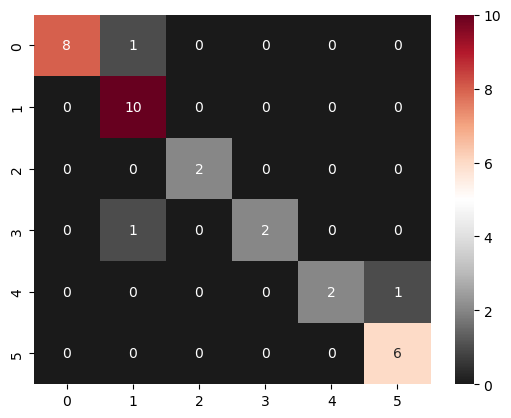

In [44]:
GB = GradientBoostingClassifier ( **Parameters )

GB.fit ( Train_X , Train_Y )

Y_GB = GB.predict ( Test_X )

Accuracy_GB = np.round ( accuracy_score ( Test_Y , Y_GB ) * 100 , 2 )

print ( "Accuracy of gradient boosting is : " ,  Accuracy_GB )

Confusion_Matrix_GB = sns.heatmap ( confusion_matrix ( Test_Y , Y_GB ) , annot = True , fmt = '0.0f' , cmap = 'RdGy_r' )

Confusion_Matrix_GB

In [45]:
Y_GB_Train = GB.predict ( Train_X )

Train_Accuracy = np.round ( accuracy_score ( Train_Y , Y_GB_Train ) * 100 , 2 )


if int ( Train_Accuracy - Accuracy_GB ) > 5.0  :
    
    print ( "There is overfitting"  )
    
else :
    
    print ( "There is no overfitting\n"  )

print ( "\nThe Training accuracy is : {} \n\nThe Testing accuracy is : {}".format( Train_Accuracy , Accuracy_GB ) )

There is overfitting

The Training accuracy is : 100.0 

The Testing accuracy is : 90.91


In [46]:
XGB = XGBClassifier ( )

Parameters = {
    
    'n_estimators': [100, 200, 300],
    
    'learning_rate': [ 0.5 , 0.1, 0.01, 0.001],  
    
    'max_depth': [3, 5, 7]  
    
}

LE = LabelEncoder ( )

Train_Y = LE.fit_transform ( Train_Y )

Test_Y = LE.fit_transform ( Test_Y )

GS = GridSearchCV ( estimator = XGBClassifier ( ) , param_grid = Parameters )

GS.fit ( Train_X , Train_Y )

Parameters = GS.best_params_ 

print ( "The the most optimum parameters are : \n\n" , Parameters )

The the most optimum parameters are : 

 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


Accuracy of extreme gradient boosting is :  90.91


<Axes: >

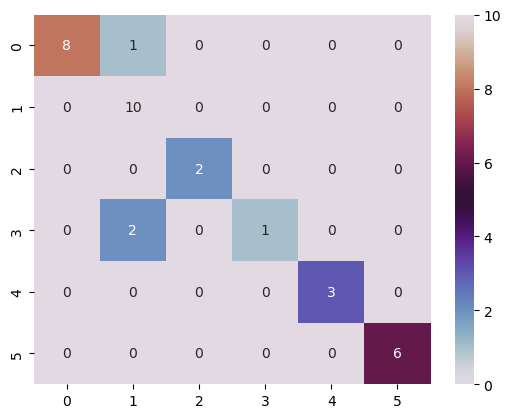

In [47]:
XGB = XGBClassifier ( **Parameters )

XGB.fit ( Train_X , Train_Y )

Y_XGB = XGB.predict ( Test_X )

Accuracy_XGB = np.round ( accuracy_score ( Test_Y , Y_XGB ) * 100 , 2 )

print ( "Accuracy of extreme gradient boosting is : " ,  Accuracy_XGB )

Confusion_Matrix_XGB = sns.heatmap ( confusion_matrix ( Test_Y , Y_XGB ) , annot = True , fmt = '0.0f' , cmap = 'twilight' )

Confusion_Matrix_XGB

In [48]:
Y_XGB_Train = XGB.predict ( Train_X )

Train_Accuracy = np.round ( accuracy_score ( Train_Y , Y_XGB_Train ) * 100 , 2 )


if int ( Train_Accuracy - Accuracy_XGB ) > 5.0  :
    
    print ( "There is overfitting"  )
    
else :
    
    print ( "There is no overfitting\n"  )

print ( "\nThe Training accuracy is : {} \n\nThe Testing accuracy is : {}".format( Train_Accuracy , Accuracy_XGB ) )

There is overfitting

The Training accuracy is : 100.0 

The Testing accuracy is : 90.91


In [49]:
Accuracies = [ Accuracy_DT , Accuracy_LR , Accuracy_GB , Accuracy_RF , Accuracy_XGB ]

Accuracies_Names = [ 'Accuracy_DT' , 'Accuracy_LR' , 'Accuracy_GB' , 'Accuracy_RF' , 'Accuracy_XGB' ]

Performance_Metrics = { 'Accuracies' : Accuracies , 'Values' : Accuracies_Names }

Performance_Metrics = pd.DataFrame(Performance_Metrics)

Performance_Metrics

,Accuracies,Values
0,81.82,Accuracy_DT
1,63.64,Accuracy_LR
2,90.91,Accuracy_GB
3,87.88,Accuracy_RF
4,90.91,Accuracy_XGB
